In [64]:
import csv 
import numpy as np 
from collections import defaultdict
from constants import *

genre_count = defaultdict(int)
per_inst_count = defaultdict(int)

duration_list = [] 

inst_occurence_list = [] 

with open("lmd_filtered.csv", "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        genres = row["genres"].split(",")
        for genre in genres:
            genre_count[genre] += 1 

        occ_list = [] 
        for inst in INSTRUMENT_NAMES:
            per_inst_count[inst] += int(row[inst])
            occ_list.append(int(row[inst]))
        
        inst_occurence_list.append(occ_list)
        
        duration_list.append(round(float(row["duration"]),2))

inst_occurence_list = np.array(inst_occurence_list)
co_matrix = np.dot(inst_occurence_list.T, inst_occurence_list)

co_diagonal = np.diagonal(co_matrix)

# with np.errstate(divide='ignore', invalid='ignore'):
co_percentage = np.nan_to_num(np.true_divide(co_matrix, co_diagonal[:, None]))
co_percentage = np.round(co_percentage, decimals=2)

# print('\ncooccurrence_matrix_percentage:\n{0}'.format(cooccurrence_matrix_percentage))

# print(genre_count)
# print (per_inst_count)

# Tag co-occurence 


In [56]:
import matplotlib.pyplot as plt

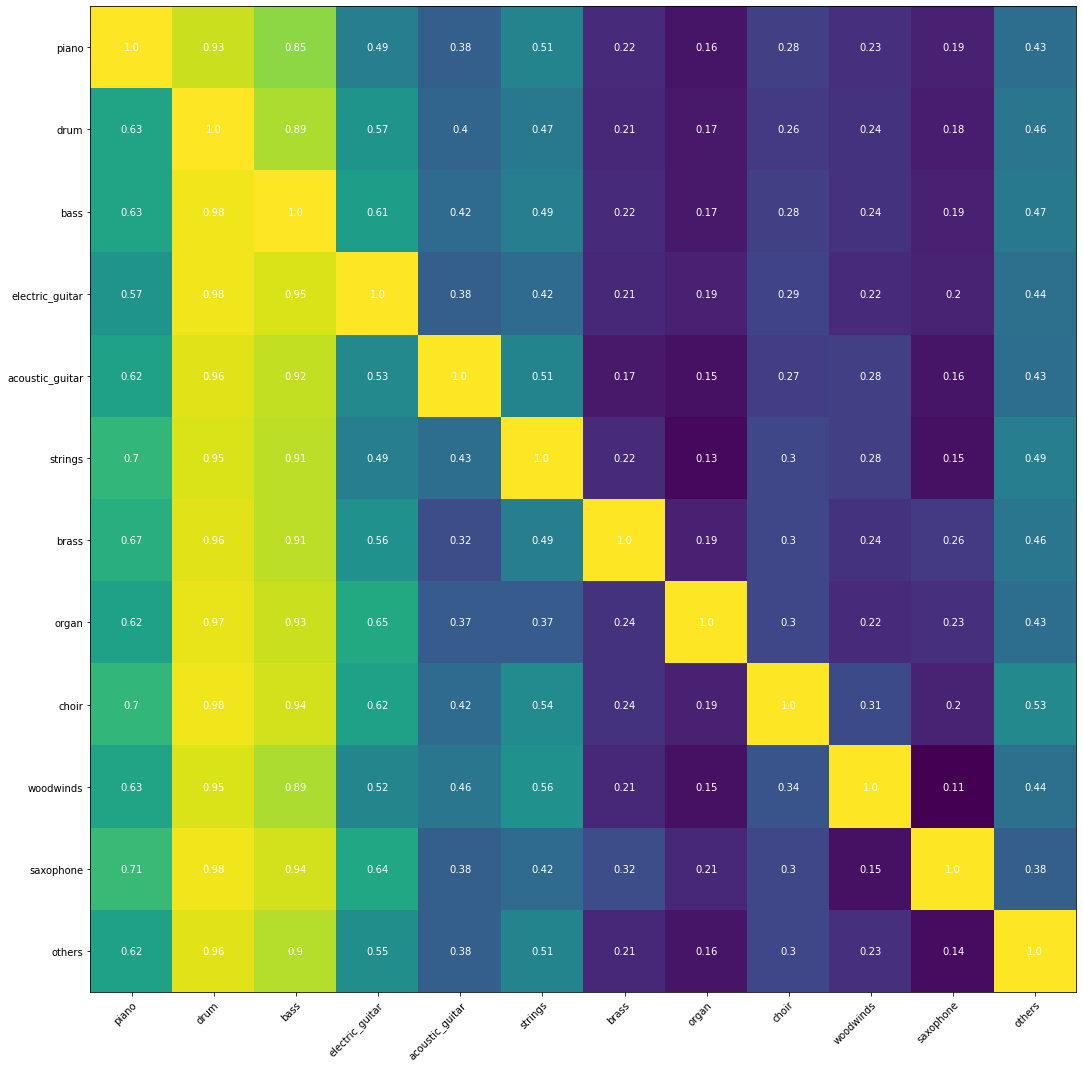

In [51]:


fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(co_percentage)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(INSTRUMENT_NAMES)), labels=INSTRUMENT_NAMES)
ax.set_yticks(np.arange(len(INSTRUMENT_NAMES)), labels=INSTRUMENT_NAMES)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(INSTRUMENT_NAMES)):
    for j in range(len(INSTRUMENT_NAMES)):
        text = ax.text(j, i, co_percentage[i, j],
                       ha="center", va="center", color="w")

# ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

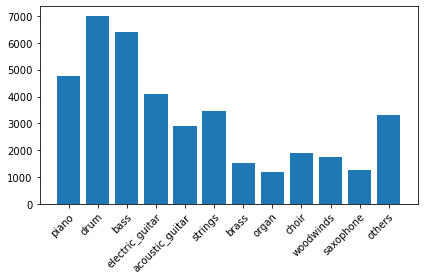

In [52]:
fig, ax = plt.subplots()

inst_height = []
for inst in INSTRUMENT_NAMES :
    inst_height.append(per_inst_count[inst])
out = ax.bar(INSTRUMENT_NAMES, inst_height)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig.tight_layout()
plt.show()

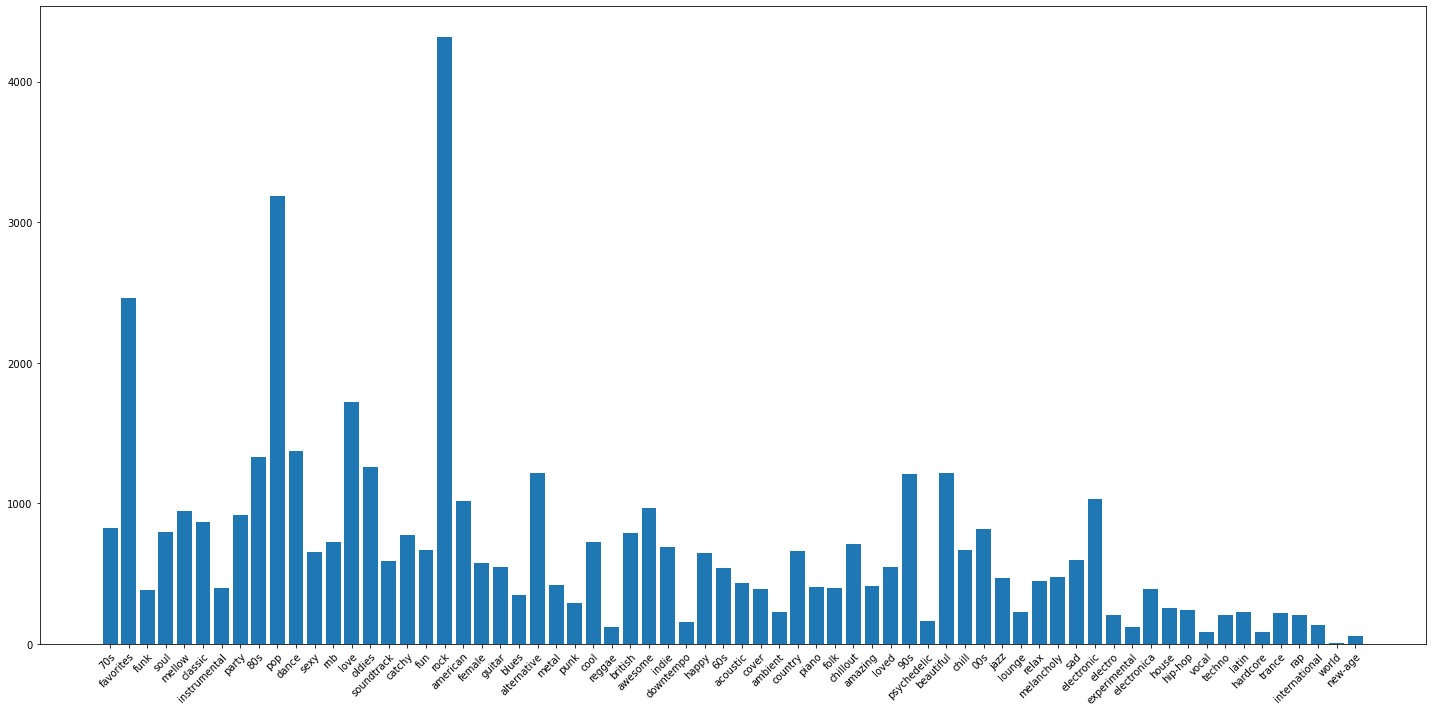

In [53]:
fig, ax = plt.subplots(figsize=(20,10))

genre_heights = []
genre_label = [] 
for k,v in genre_count.items() :
    genre_heights.append(v)
    genre_label.append(k)

# out = ax.bar(list(range(len(genre_label))), genre_heights)
out = ax.bar(list(genre_label), genre_heights)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig.tight_layout()
plt.show()

In [54]:
genre_occurence_list = [] 
genre_list = list(genre_count.keys())

with open("lmd_filtered.csv", "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        genres = row["genres"].split(",")
        
        occ_list = [] 
        for g in genre_list : 
            if g in genres : 
                occ_list.append(1)
            else :
                occ_list.append(0) 

        genre_occurence_list.append(occ_list)

genre_occurence_list = np.array(genre_occurence_list)

co_matrix = np.dot(genre_occurence_list.T, genre_occurence_list)

co_diagonal = np.diagonal(co_matrix)

# with np.errstate(divide='ignore', invalid='ignore'):
co_percentage = np.nan_to_num(np.true_divide(co_matrix, co_diagonal[:, None]))
co_percentage = np.round(co_percentage, decimals=2)
print (co_percentage)
# print('\ncooccurrence_matrix_percentage:\n{0}'.format(cooccurrence_matrix_percentage))

# print(genre_count)
# print (per_inst_count)

# Tag co-occurence 


[[1.   0.61 0.2  ... 0.   0.   0.  ]
 [0.2  1.   0.09 ... 0.   0.   0.01]
 [0.43 0.58 1.   ... 0.01 0.   0.  ]
 ...
 [0.01 0.06 0.02 ... 1.   0.01 0.01]
 [0.   0.25 0.12 ... 0.12 1.   0.  ]
 [0.   0.24 0.   ... 0.02 0.   1.  ]]


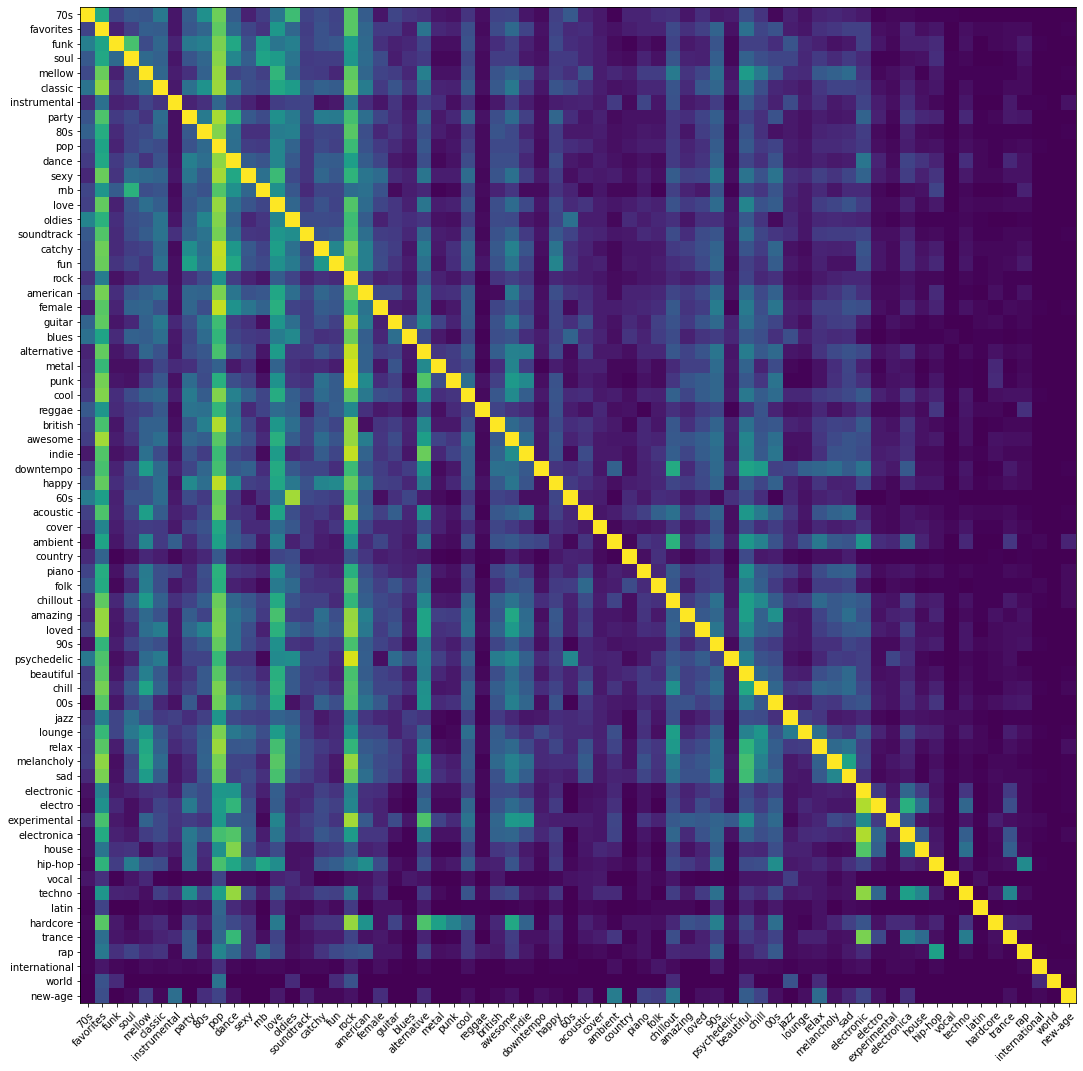

In [44]:


fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(co_percentage)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(genre_list)), labels=genre_list)
ax.set_yticks(np.arange(len(genre_list)), labels=genre_list)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# for i in range(len(genre_list)):
#     for j in range(len(genre_list)):
#         text = ax.text(j, i, co_percentage[i, j],
#                        ha="center", va="center", color="w")

# ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

[241.97 175.88 341.49 ... 224.72 251.77 180.53]


(array([ 206.,  112.,  144.,  313.,  638., 1015., 1520., 1556.,  969.,
         532.,  247.,  132.,   85.,   42.,   28.,    6.,    0.,    0.,
           5.,    2.]),
 array([ 30.02  ,  58.3415,  86.663 , 114.9845, 143.306 , 171.6275,
        199.949 , 228.2705, 256.592 , 284.9135, 313.235 , 341.5565,
        369.878 , 398.1995, 426.521 , 454.8425, 483.164 , 511.4855,
        539.807 , 568.1285, 596.45  ]),
 <BarContainer object of 20 artists>)

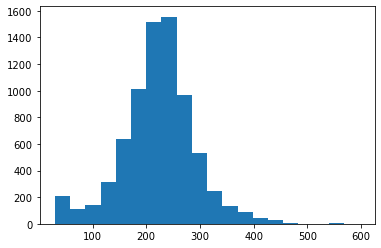

In [66]:
duration_list = np.array(duration_list)
print (duration_list)
plt.hist(duration_list, bins=20)